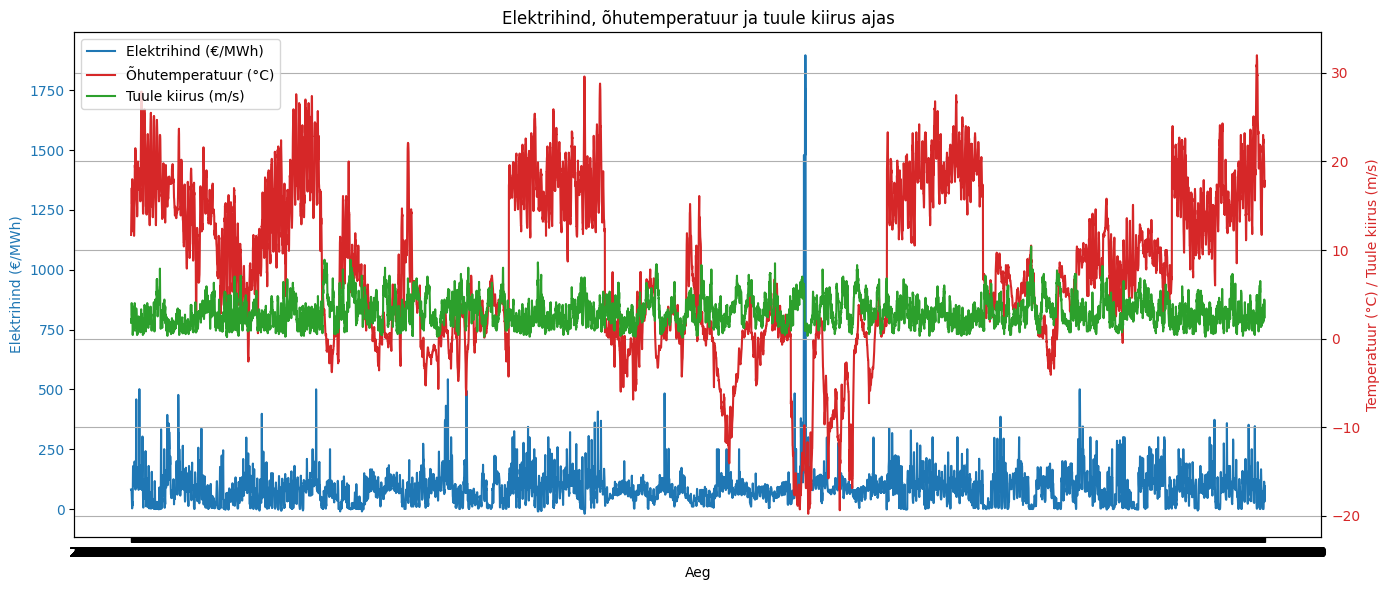

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Lae elektrihindade graafikud

source_data = pd.read_json('elektrihind/el_data_2024.json')
electricity_data = pd.json_normalize(source_data["data"])

source_data_2 = pd.read_csv('tallinn_harku_2024.csv')
weather_data = pd.DataFrame(source_data_2)

# kuupäeva+time veerg
weather_data['datetime'] = pd.to_datetime(weather_data['Aasta'].astype(str) + '-' +
                                          weather_data['Kuu'].astype(str).str.zfill(2) + '-' +
                                          weather_data['Päev'].astype(str).str.zfill(2) + ' ' +
                                          weather_data['Kell (UTC)'])
# Valikuline: näitab ainult kuupäev ja tund:minut
weather_data['datetime'] = weather_data['datetime'].dt.strftime(
    '%Y-%m-%d %H:%M')

merged_data = pd.merge(electricity_data, weather_data,
                       on='datetime', how='inner')


fig, ax1 = plt.subplots(figsize=(14, 6))

# Elektrihind (€/MWh) - vasak telg
ax1.plot(merged_data["datetime"], merged_data["price"],
         label="Elektrihind (€/MWh)", color='tab:blue')
ax1.set_xlabel("Aeg")
ax1.set_ylabel("Elektrihind (€/MWh)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Teine y-telg temperatuurile ja tuule kiirusele
ax2 = ax1.twinx()
ax2.plot(merged_data["datetime"], merged_data["Õhutemperatuur °C"],
         label="Õhutemperatuur (°C)", color='tab:red')
ax2.plot(merged_data["datetime"], merged_data["10 minuti keskmine tuule kiirus m/s"],
         label="Tuule kiirus (m/s)", color='tab:green')
ax2.set_ylabel("Temperatuur (°C) / Tuule kiirus (m/s)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legend mõlemale teljele
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Elektrihind, õhutemperatuur ja tuule kiirus ajas")
plt.grid()
plt.tight_layout()
plt.show()


In [5]:
# Korrelatsioonimaatriks
correlation_matrix = merged_data[["price", "Õhutemperatuur °C",
                                 "10 minuti keskmine tuule kiirus m/s"]].corr()
print("Korrelatsioonimaatriks:")
print(correlation_matrix)


Korrelatsioonimaatriks:
                                        price  Õhutemperatuur °C  \
price                                1.000000          -0.081956   
Õhutemperatuur °C                   -0.081956           1.000000   
10 minuti keskmine tuule kiirus m/s -0.206604          -0.081296   

                                     10 minuti keskmine tuule kiirus m/s  
price                                                          -0.206604  
Õhutemperatuur °C                                              -0.081296  
10 minuti keskmine tuule kiirus m/s                             1.000000  


## Korrelatsioonianalüüsi kokkuvõte

Korrelatsioonimaatriks näitab, kui tugev ja millises suunas on seos elektrihinna, õhutemperatuuri ja 10 minuti keskmise tuule kiiruse vahel. Tulemused on järgmised:

- **Elektrihind ja õhutemperatuur:**  
  Kui korrelatsioonikordaja on negatiivne (nt -0.3), tähendab see, et temperatuuri tõustes elektrihind pigem langeb. Kui väärtus on lähedal nullile, siis tugevat seost ei ole.

- **Elektrihind ja tuule kiirus:**  
  Kui korrelatsioonikordaja on positiivne (nt 0.4), tähendab see, et tuule kiiruse kasvades elektrihind pigem tõuseb. Kui väärtus on negatiivne või nullilähedane, siis seos puudub või on nõrk.

- **Õhutemperatuur ja tuule kiirus:**  
  See näitab, kas soojematel päevadel on tuul tugevam või nõrgem, kuid see pole elektrihinna seisukohalt esmane.

**Tõlgendus:**  
- Korrelatsioonikordaja väärtus vahemikus 0,5...1 või -0,5...-1 viitab tugevale seosele.
- Väärtused vahemikus 0,3...0,5 või -0,3...-0,5 viitavad mõõdukale seosele.
- Väärtused vahemikus -0,3...0,3 viitavad nõrgale või olematule seosele.

Vaata oma `print(correlation_matrix)` väljundit ja tõlgenda tulemusi vastavalt ülaltoodule.  
Kui kõik väärtused on nullilähedased, siis otsest seost nende tunnuste vahel ei ole.